# Classification using K-Nearest Neighbours 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
data=pd.read_csv('/Users/aparajit/Desktop/PROJECTS/Python/Python for Data Science and Machine Learning /Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/K-Nearest-Neighbors/Classified Data.csv',index_col=0)

In [4]:
data.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0


 in knn since it classfies a variable basis the diastance the scale of variable matters
 so standardization is important

In [5]:
# Sklearn has standard scalar method to standardize data 
from sklearn.preprocessing import StandardScaler

In [6]:
scalar= StandardScaler()

In [7]:
scalar.fit(data.drop('TARGET CLASS',axis=1)) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scalar_features= scalar.transform(data.drop('TARGET CLASS',axis=1))

In [9]:
# this gives us an array of transformed features 
scalar_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
data.columns[:-1] # taking all but the last column 

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [11]:
df=pd.DataFrame(data=scalar_features,columns=data.columns[:-1])

In [12]:
df.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850


In [13]:
x=df 
y=data['TARGET CLASS']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

calling k neighbour classifier from the the family neighbour

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# the KNeighbours paarameters also takes in default value of k
knn= KNeighborsClassifier(n_neighbors=5)

In [18]:
# fitting the model
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
pred=knn.predict(x_test)

Model evaluation for K=1

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[154   5]
 [ 12 129]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       159
          1       0.96      0.91      0.94       141

avg / total       0.94      0.94      0.94       300



here we took k =1 

to tune the model to find an optimal value of k we will use elbow method

we will tryt to run multiple iterations of k to plot error rates 

plot them and find the optimal value of k 

In [22]:
accuracy_rate=[]
for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_1 =knn.predict(x_test)
    conf=confusion_matrix(y_test,pred_1)
    acc=(conf[0,0]+conf[1,1])/np.sum(conf)
    accuracy_rate.append(acc)

Text(0,0.5,'Model Accuracy')

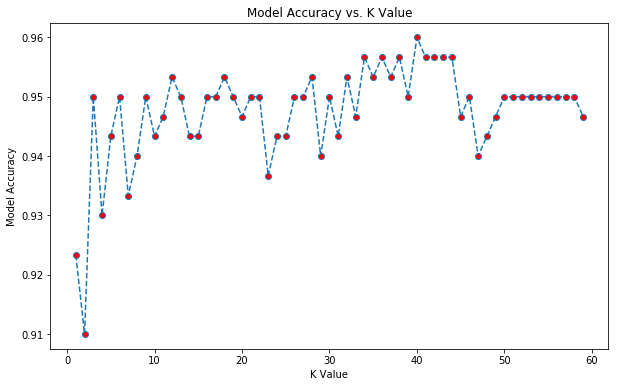

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),accuracy_rate,linestyle='--',marker='o',markerfacecolor='red')
plt.title('Model Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Model Accuracy')
# we can pick out the optimal value of K using the plot below 

it seems k=40 has the best accuracy

In [24]:
knn= KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[154   5]
 [  7 134]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       159
          1       0.96      0.95      0.96       141

avg / total       0.96      0.96      0.96       300



# Completed !!